# Case Study 2

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame(pd.read_csv("casestudy.csv", header=0, index_col=0))
df

,customer_email,net_revenue,year
0,nhknapwsbx@gmail.com,249.92,2015
1,joiuzbvcpn@gmail.com,87.61,2015
2,ukkjctepxt@gmail.com,168.38,2015
3,gykatilzrt@gmail.com,62.40,2015
4,mmsgsrtxah@gmail.com,43.08,2015
...,...,...,...
685922,qzqttwiftu@gmail.com,184.58,2017
685923,pjodiifjop@gmail.com,133.03,2017
685924,appaplmgko@gmail.com,200.98,2017
685925,wvkpmwsgck@gmail.com,235.35,2017


### Total revenue for the current year

In [28]:
unique_year = df.groupby(['year']).sum()
unique_year

,net_revenue
year,
2015,29036749.19
2016,25730943.59
2017,31417495.03


In [4]:
def left_join(df1: pd.DataFrame, df2: pd.DataFrame) -> pd.DataFrame:
    """
    Function to perform left join on two dataframes
    :param df1: first dataframe
    :param df2: second dataframe
    :return result: resulting left joined dataframe
    """
    left_merge = pd.merge(df1, df2, how='left', on=['customer_email'], indicator=True)
    return left_merge[left_merge['_merge'] == 'left_only']

In [5]:
def inner_join(df1: pd.DataFrame, df2: pd.DataFrame) -> pd.DataFrame:
    """
    Function to perform inner join on two dataframes
    :param df1: first dataframe
    :param df2: second dataframe
    :return result: resulting inner joined dataframe
    """
    return pd.merge(df1, df2, how='inner', on=['customer_email'])

### New Customer Revenue

In [6]:
for index, i in enumerate(unique_year.index):
    if index + 1 < len(unique_year.index):
        new_customers = left_join(df[df['year'] == i+1], df[df['year'] == i])
        print(new_customers[['customer_email', 'net_revenue_x', 'year_x']])        

               customer_email  net_revenue_x  year_x
0        mwrossuukz@gmail.com         197.26    2016
1        gkwsoupawk@gmail.com          38.28    2016
2        vlyigtgfzs@gmail.com         154.57    2016
3        yfirychuhk@gmail.com         102.47    2016
4        trnzgqinuu@gmail.com          32.03    2016
...                       ...            ...     ...
204639   sqodpufunf@gmail.com          29.62    2016
204640   dcakqgznnm@gmail.com         146.47    2016
204642   rdotspqdxi@gmail.com         169.79    2016
204643   fkweqlmmjw@gmail.com          79.71    2016
204644   pidugzoeej@gmail.com         116.80    2016

[145062 rows x 3 columns]
               customer_email  net_revenue_x  year_x
0        mwrossuukz@gmail.com          96.61    2017
1       qvjfterwnk@gmail.com          176.00    2017
2        vlyigtgfzs@gmail.com          73.47    2017
3        yfirychuhk@gmail.com         138.17    2017
4        fdkiioqtli@gmail.com         156.87    2017
...                

### Existing Customer Growth

In [7]:
for index, i in enumerate(unique_year.index):
    if index + 1 < len(unique_year.index):
        existing_customers = inner_join(df[df['year'] == i+1], df[df['year'] == i])
        existing_customers['existing_customer_growth'] = existing_customers['net_revenue_x'] - existing_customers['net_revenue_y']
        print(existing_customers[['customer_email', 'existing_customer_growth']])

              customer_email  existing_customer_growth
0       baiikostmd@gmail.com                    -28.13
1       lfeafnigbu@gmail.com                    -19.93
2       tqxsjlgjpi@gmail.com                    -74.21
3       hxshgpdxtr@gmail.com                     36.76
4       zvhsssvgor@gmail.com                     22.29
...                      ...                       ...
59579   tpdtoiokyt@gmail.com                    -77.28
59580   yeserbsmyf@gmail.com                     37.12
59581   nyunstvnpc@gmail.com                     -6.41
59582   mezrjfkced@gmail.com                     -4.02
59583   kxqglfdktu@gmail.com                    -36.01

[59584 rows x 2 columns]
             customer_email  existing_customer_growth
0      yixtbjnxce@gmail.com                    -67.46
1      gwqjyelgct@gmail.com                    149.48
2      hxshgpdxtr@gmail.com                    -39.25
3      gipqsrvngd@gmail.com                     16.84
4      cdvwonzpwu@gmail.com                 

### Revenue lost from attrition

In [8]:
for index, i in enumerate(unique_year.index):
    if index + 1 < len(unique_year.index):
        attrition = list(unique_year[unique_year.index == i+1]['net_revenue'])[0] - float(list(unique_year[unique_year.index == i]['net_revenue'])[0])
        print(f"In {i+1}, the company's revenue attrition was {round(attrition, 2)} dollars")

In 2016, the company's revenue attrition was -3305805.6 dollars
In 2017, the company's revenue attrition was 5686551.44 dollars


### Existing Customer Revenue in current and previous year 

In [9]:
for index, i in enumerate(unique_year.index):
    if index + 1 < len(unique_year.index):
        existing_customers = inner_join(df[df['year'] == i+1], df[df['year'] == i])
        existing_customers = existing_customers.rename(columns={'net_revenue_x': 'current_revenue', 'net_revenue_y': 'previous_revenue', 'year_x': 'current_year', 'year_y': 'previous_year'})
        print(existing_customers)

              customer_email  current_revenue  current_year  previous_revenue  \
0       baiikostmd@gmail.com           142.57          2016            170.70   
1       lfeafnigbu@gmail.com            35.06          2016             54.99   
2       tqxsjlgjpi@gmail.com            33.50          2016            107.71   
3       hxshgpdxtr@gmail.com           217.35          2016            180.59   
4       zvhsssvgor@gmail.com            43.84          2016             21.55   
...                      ...              ...           ...               ...   
59579   tpdtoiokyt@gmail.com             5.60          2016             82.88   
59580   yeserbsmyf@gmail.com            83.72          2016             46.60   
59581   nyunstvnpc@gmail.com            18.56          2016             24.97   
59582   mezrjfkced@gmail.com           114.17          2016            118.19   
59583   kxqglfdktu@gmail.com            37.31          2016             73.32   

       previous_year  
0   

### Total number of customers in current and previous year

In [10]:
df.groupby(['year']).nunique()['customer_email']

year
2015    231294
2016    204646
2017    249987
Name: customer_email, dtype: int64

### New Customers

In [11]:
for index, i in enumerate(unique_year.index):
    if index + 1 < len(unique_year.index):
        new_customers = left_join(df[df['year'] == i+1], df[df['year'] == i])
        print(new_customers[['customer_email', 'year_x']])        

               customer_email  year_x
0        mwrossuukz@gmail.com    2016
1        gkwsoupawk@gmail.com    2016
2        vlyigtgfzs@gmail.com    2016
3        yfirychuhk@gmail.com    2016
4        trnzgqinuu@gmail.com    2016
...                       ...     ...
204639   sqodpufunf@gmail.com    2016
204640   dcakqgznnm@gmail.com    2016
204642   rdotspqdxi@gmail.com    2016
204643   fkweqlmmjw@gmail.com    2016
204644   pidugzoeej@gmail.com    2016

[145062 rows x 2 columns]
               customer_email  year_x
0        mwrossuukz@gmail.com    2017
1       qvjfterwnk@gmail.com     2017
2        vlyigtgfzs@gmail.com    2017
3        yfirychuhk@gmail.com    2017
4        fdkiioqtli@gmail.com    2017
...                       ...     ...
249982   qzqttwiftu@gmail.com    2017
249983   pjodiifjop@gmail.com    2017
249984   appaplmgko@gmail.com    2017
249985   wvkpmwsgck@gmail.com    2017
249986   aregboumbw@gmail.com    2017

[229028 rows x 2 columns]


### Lost Customers

In [12]:
for index, i in enumerate(unique_year.index):
    if index + 1 < len(unique_year.index):
        new_customers = left_join(df[df['year'] == i], df[df['year'] == i+1])
        print(new_customers[['customer_email', 'year_x']])        

               customer_email  year_x
0        nhknapwsbx@gmail.com    2015
1        joiuzbvcpn@gmail.com    2015
2        ukkjctepxt@gmail.com    2015
3        gykatilzrt@gmail.com    2015
4        mmsgsrtxah@gmail.com    2015
...                       ...     ...
231289   xtrpmgjbwp@gmail.com    2015
231290   peeorxpsbr@gmail.com    2015
231291   vanasezjpw@gmail.com    2015
231292   dnpremlztb@gmail.com    2015
231293   qsgswrpycl@gmail.com    2015

[171710 rows x 2 columns]
               customer_email  year_x
0        mwrossuukz@gmail.com    2016
1        gkwsoupawk@gmail.com    2016
2        vlyigtgfzs@gmail.com    2016
3        yfirychuhk@gmail.com    2016
4        trnzgqinuu@gmail.com    2016
...                       ...     ...
204639   sqodpufunf@gmail.com    2016
204641   mezrjfkced@gmail.com    2016
204642   rdotspqdxi@gmail.com    2016
204644   pidugzoeej@gmail.com    2016
204645   kxqglfdktu@gmail.com    2016

[183687 rows x 2 columns]


### Additional Plots

Net revenue in all 3 years of Most Loyal Customers

<AxesSubplot:xlabel='Customers', ylabel='Net Revenue'>

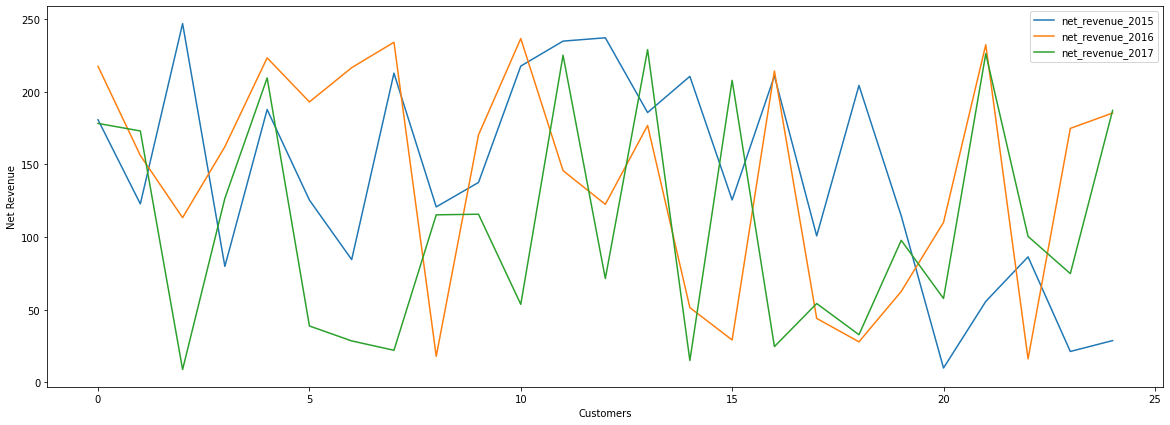

In [105]:
_2015 = df[df['year'] == 2015]
_2016 = df[df['year'] == 2016]
_2017 = df[df['year'] == 2017]

most_loyal_customers = _2015.merge(_2016,on='customer_email').merge(_2017,on='customer_email')
most_loyal_customers = most_loyal_customers.rename(columns={'net_revenue_x': 'net_revenue_2015', 'net_revenue_y': 'net_revenue_2016', 'net_revenue': 'net_revenue_2017'})
most_loyal_customers.head(25).plot(xlabel="Customers", ylabel="Net Revenue", y=['net_revenue_2015', 'net_revenue_2016', 'net_revenue_2017'], figsize=(20,7))

Top 10 Average revenues of Most loyal Customers

<AxesSubplot:xlabel='customer_email'>

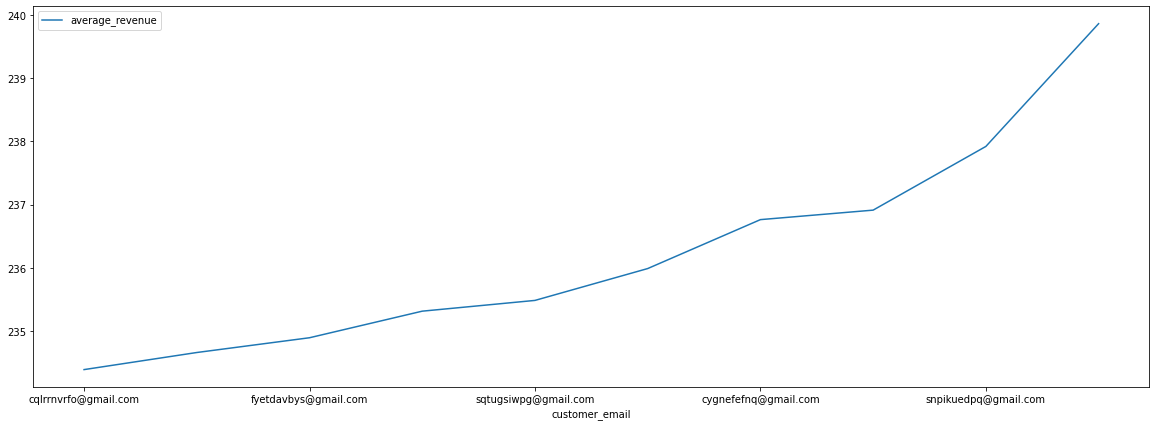

In [127]:
most_loyal_customers['average_revenue'] = most_loyal_customers[['net_revenue_2015', 'net_revenue_2016', 'net_revenue_2017']].mean(axis=1)
most_loyal_customers = most_loyal_customers[['customer_email', 'net_revenue_2015', 'net_revenue_2016', 'net_revenue_2017', 'average_revenue']]
most_loyal_customers.sort_values('average_revenue')[['customer_email', 'average_revenue']].tail(10).set_index(['customer_email']).plot(figsize=(20,7))

Max, Min and Mean revenue of all 3 years. Interesting observation: Max, Min and Mean are almost same for all 3 years.

In [129]:
df.groupby(df['year'])['net_revenue'].agg([
        np.max, np.min, np.mean,
    ])

,amax,amin,mean
year,,,
2015,250.0,1.0,125.540434
2016,250.0,1.0,125.733919
2017,250.0,1.0,125.676515
